# **Atividade True RMS**

# **Construção dos sinais senoidais**

**Importa as bibliotecas**

In [ ]:
#IMPORTA AS BIBLIOTECAS
import numpy as np #Biblioteca numpy (suporte numérico)
import matplotlib.pyplot as plt #biblioteca matplotlib (suporte gráfico)

**Define os parâmetros para gerar o sinal senoidal da rede**

In [ ]:
#PARÂMETROS DO SINAL SENOIDAL DA REDE
f = 60  #Frequência da senoide em Hz
Vp = 180  #Amplitude de pico da senoide em V
fa = 1000 #Frequência de amostragem (O DSP possui uma fa de 30 kHz)
qtd_periodos = 3600 #Quantidade de períodos senoidais gerados (Analisar uma senoide durante 1 minuto)

**Realiza o processo de amostragem do sinal**

In [ ]:
#PROCESSO DE AMOSTRAGEM DO SINAL
tempo = np.arange(0, (qtd_periodos * (1 / f)), 1 / fa) #Gera um vetor tempo com qtd_periodos, com uma taxa de amostragem fa

**Define os parâmetros dos ruídos do sinal**

In [ ]:
#ADICIONA RUÍDO NA AMPLITUDE E NA FREQUÊNCIA
Vp_fator = 10 #Fator escalar para adição de ruído na amplitude
f_fator = 0.1 #Fator escalar para adição de ruído na frequência

ruido_amplitude = Vp_fator * np.random.randn(len(tempo)) #Adiciona o ruído à amplitude
ruido_frequencia = f_fator * np.sin(2 * np.pi * f_fator * tempo) #Adiciona o ruído à frequência

**Cria um sinal senoidal para representar o sinal de tensão da rede - Sem ruído**


In [ ]:
#GERA A SENOIDE ORIGINAL
sinal = Vp * np.sin(2 * np.pi * f * tempo)

**Cria um sinal senoidal para representar o sinal de tensão da rede - Com ruído**

In [ ]:
#GERA A SENOIDE COM O RUÍDO
sinal_ruido = (Vp + ruido_amplitude) * np.sin(2 * np.pi * (f + ruido_frequencia) * tempo)

**Cria uma função que realiza o processo de segmentação do sinal senoidal - Simular análise em tempo real**

In [ ]:
#SIMULA O PROCESSO DE AQUISIÇÃO E ANÁLISE EM TEMPO REAL (1 EM 1 SEGUNDO)
def segmentar_senoide(senoide, tempo, qtd_amostras_segmento): #Cria uma função que segmenta a senoide de 1 minuto em trechos de 1 segundo
  n_segmentos = int(len(tempo) / qtd_amostras_segmento) #Calcula o número de segmentos com base nas informações acima (1 minuto e 1 segundo)

  segmentos = [] #Cria uma lista para armazenar os subvetores

  i = 0 #Inicializa o contador
  for i in range(n_segmentos): #Itera sobre os segmentos
    valores = senoide[i * qtd_amostras_segmento:(i + 1) * qtd_amostras_segmento]  #Obtém as amostras de cada segmento
    tempos = tempo[i * qtd_amostras_segmento:(i + 1) * qtd_amostras_segmento] #Obtém os tempos de cada segmento
    segmentos.append((valores, tempos)) #Adiciona o segmento à lista

  return segmentos #Retorna os segmentos

**Segmenta o sinal original**

In [ ]:
segmentos_senoide = segmentar_senoide(sinal, tempo, fa) #Segmenta a senoide original

sinal_segmento = [] #Inicializa uma lista para armazenar os sinais segmentados
tempo_segmento = [] #Inicializa uma lista para armazenar os tempos segmentados

#Adiciona os trechos de tempo e senoide aos vetores
for segmento in segmentos_senoide: #Itera sob todos os segmentos
  sinal_segmento.append(segmento[0]) #O primeiro item refere-se ao sinal
  tempo_segmento.append(segmento[1]) #O segundo item refere-se ao tempo

**Segmenta o sinal senoidal com ruído**

In [ ]:
segmentos_senoide_ruido = segmentar_senoide(sinal_ruido, tempo, fa) #Segmenta a senoide com ruido

sinal_segmento_ruido = [] #Inicializa uma lista para armazenar os sinais segmentados

#Adiciona os trechos de tempo e senoide aos vetores
for segmento in segmentos_senoide_ruido: #Itera sob todos os segmentos
  sinal_segmento_ruido.append(segmento[0]) #O primeiro item refere-se ao sinal

**Cria os gráficos dos segmentos do sinal original e com ruído**

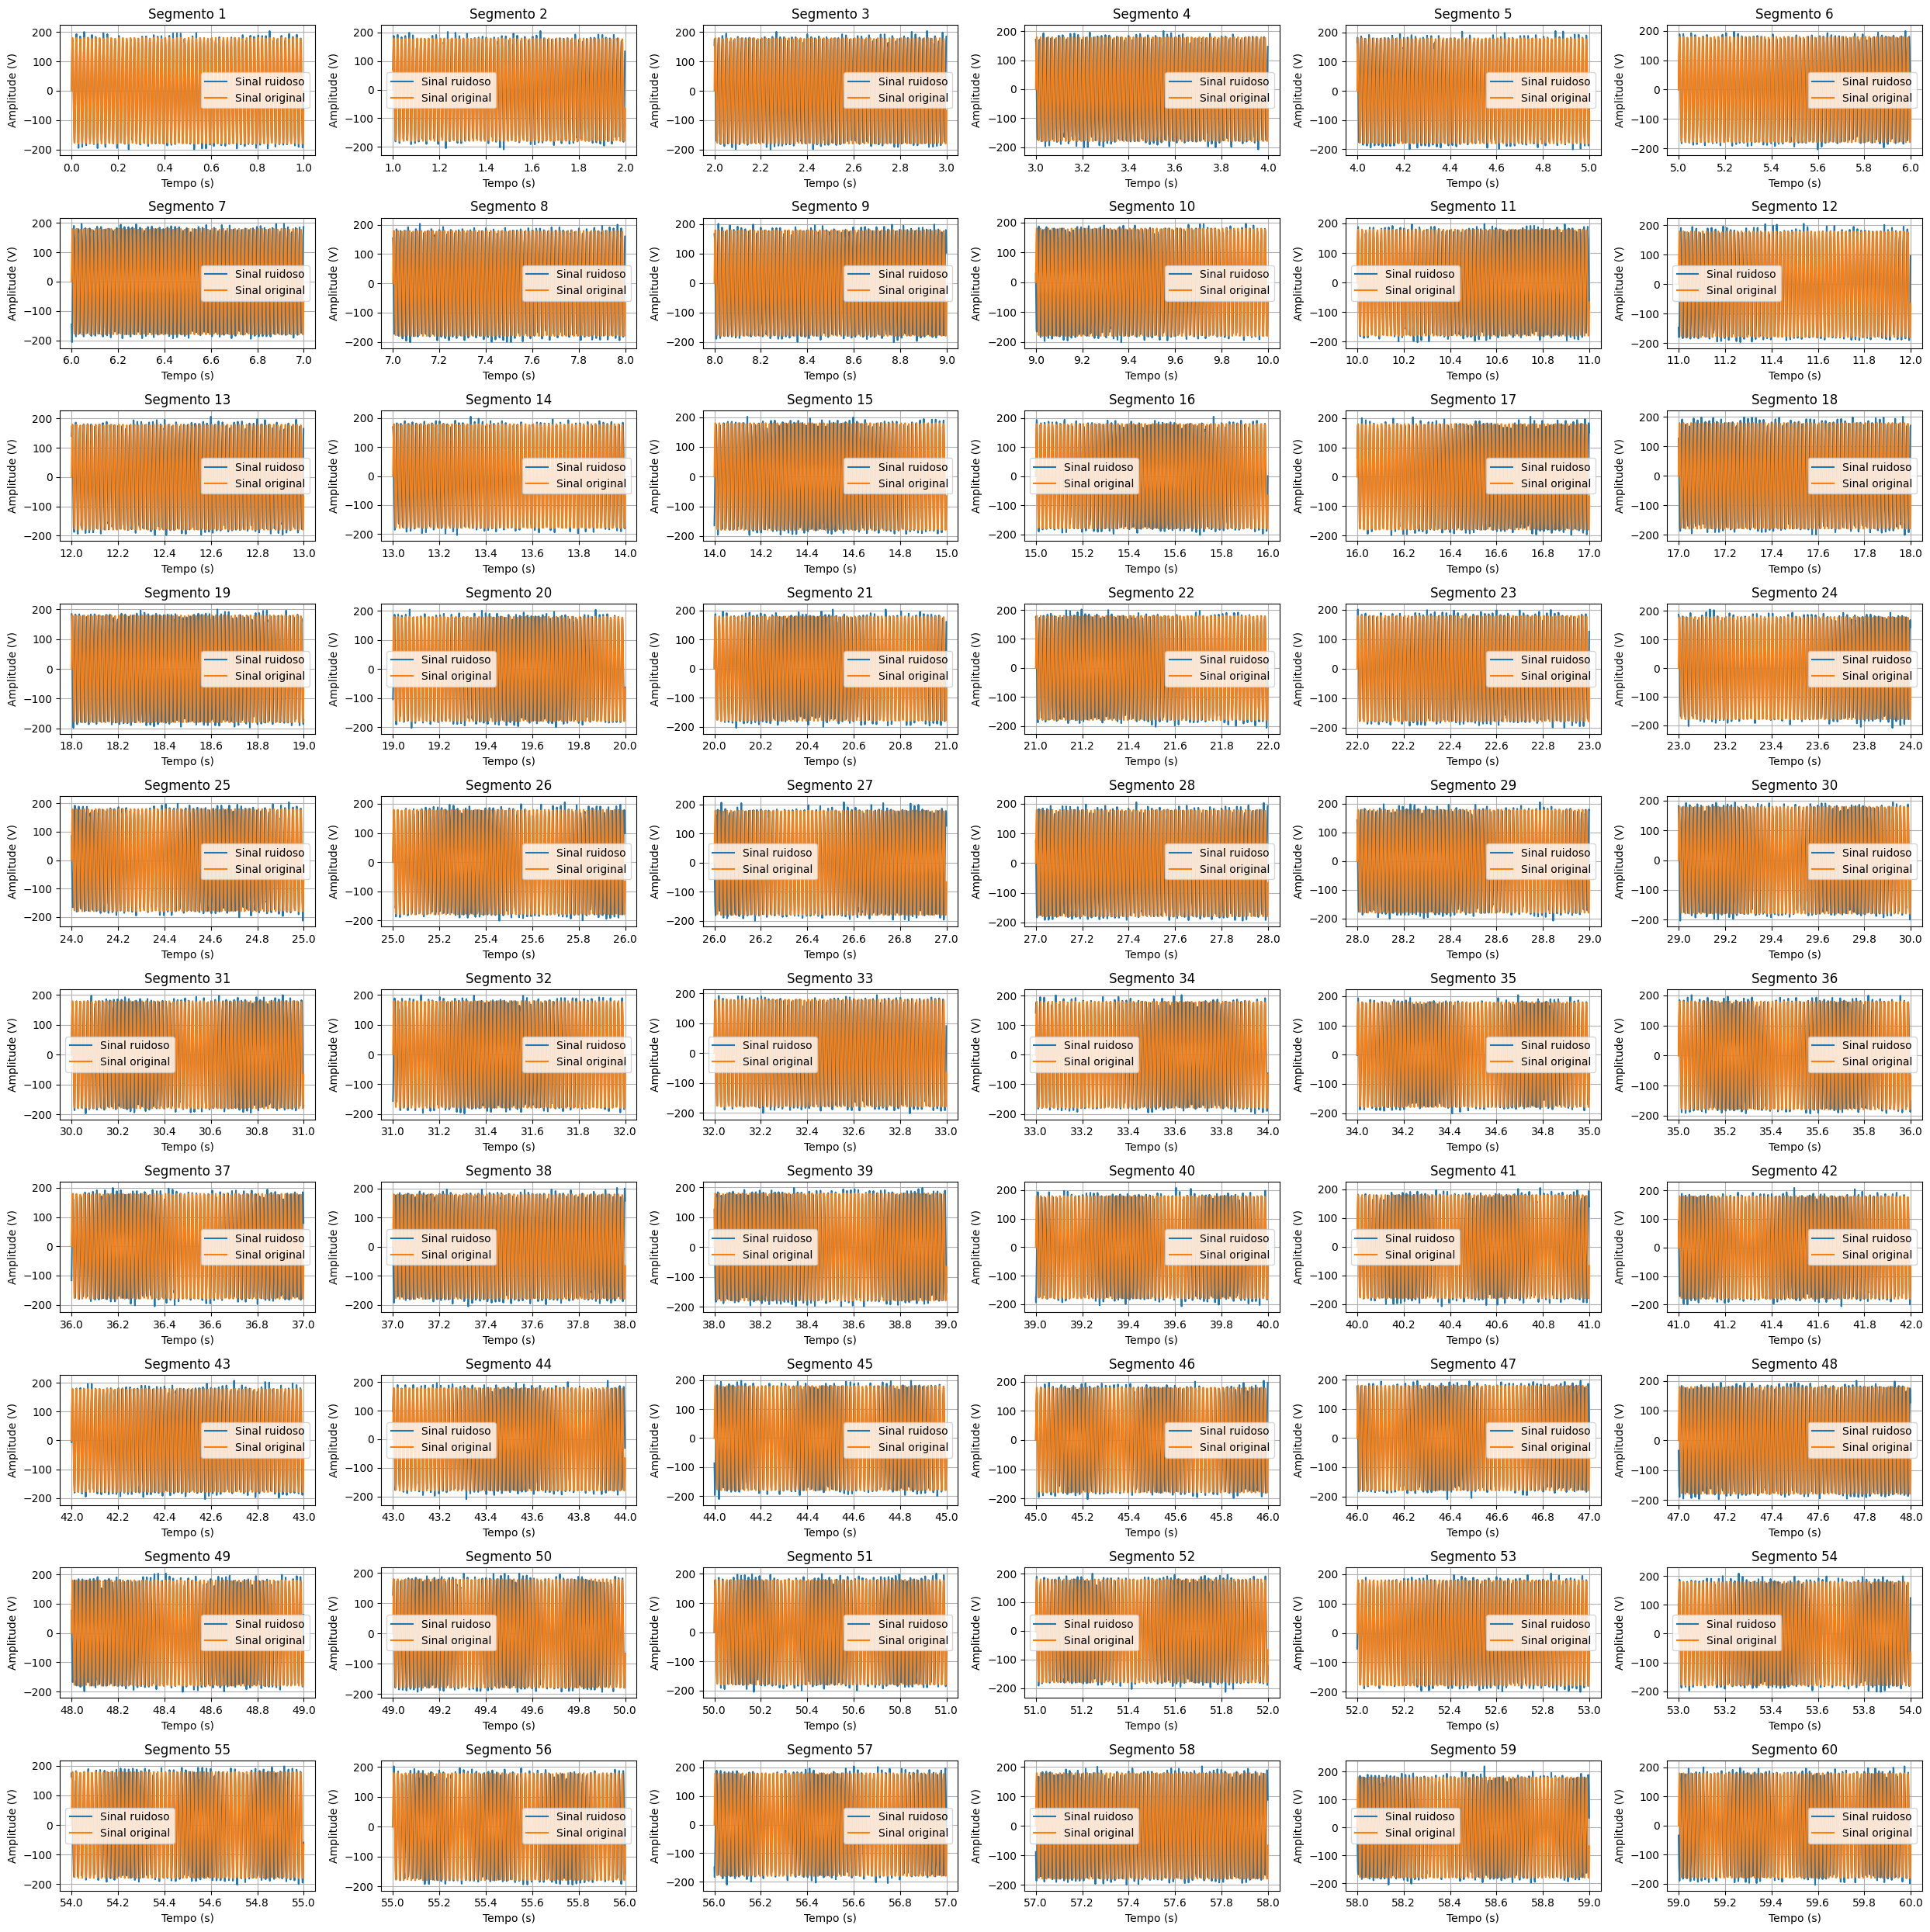

In [ ]:
#PLOTA OS GRÁFICOS
fig, axes = plt.subplots(nrows=10, ncols=6, figsize=(25, 25)) #Define a estruturação da figura

i = 0 #Inicializa o contador
for i in range(len(sinal_segmento)): #Itera sobre os segmentos e plota cada um em uma subfigura
    ax = axes[i // 6, i % 6] #Define a estruturação da figura
    ax.plot(tempo_segmento[i], sinal_segmento_ruido[i], label='Sinal ruidoso') #Plota a senoide sem ruído
    ax.plot(tempo_segmento[i], sinal_segmento[i], label='Sinal original') #Plota a senoide com ruído
    ax.set_xlabel('Tempo (s)') #Define a legenda do eixo x
    ax.set_ylabel('Amplitude (V)') #Define a legenda do eixo y
    ax.set_title(f'Segmento {i+1}') #Define os títulos dos gráficos
    ax.grid(True) #Ativa as "grades"
    ax.legend() #Ativa a legenda

plt.tight_layout() #Ajusta o espaçamentos entre subfiguras
plt.show() #Plota o gráfico

# **Cálculo do RMS por meio da equação**

**Realiza o cálculo do valor True RMS do sinal senoidal**

**Equação RMS:**
\begin{equation}
\text{RMS} = \sqrt{\frac{\sum_{n=0}^{N-1} |x_n|^2}{N}}
\end{equation}

In [ ]:
#CALCULA O RMS PARA CADA PERÍODO DEFINIDO - EQUAÇÃO RMS - SINAL ORIGINAL E SINAL RUIDOSO
rms_eq_sinal = np.zeros(len(sinal_segmento)) #Inicializa um vetor para armazenar os valores RMS do sinal original
rms_eq_sinal_ruido = np.zeros(len(sinal_segmento_ruido)) #Inicializa um vetor para armazenar os valores RMS do sinal ruidoso

i = 0 #Inicializa um contador
for i in range(len(sinal_segmento)): #Itera sob todos os segmentos
  soma = 0 #Inicializa a variável soma
  soma_ruido = 0 #Inicializa a variável soma_ruido
  j = 0 #Inicializa um contador
  for j in range(len(sinal_segmento[i])): #Itera sob todas as amostras do segmento
    soma += (sinal_segmento[i][j])**2 #Realiza a soma quadrática de cada amostra do segmento - sinal original
    soma_ruido += (sinal_segmento_ruido[i][j])**2 #Realiza a soma quadrática de cada amostra do segmento - sinal ruidoso
  rms_eq_sinal[i] = soma #Atribui o resultado a uma variável - sinal original
  rms_eq_sinal_ruido[i] = soma_ruido #Atribui o resultado a uma variável - sinal ruidoso

rms_eq_sinal /= len(sinal_segmento[i]) #Realiza a média - sinal original
rms_eq_sinal = np.sqrt(rms_eq_sinal) #Extrai a raiz quadrada - sinal original

rms_eq_sinal_ruido /= len(sinal_segmento_ruido[i]) #Realiza a média - sinal ruidoso
rms_eq_sinal_ruido = np.sqrt(rms_eq_sinal_ruido) #Extrai a raiz quadrada - sinal ruidoso

**Valores estatísticos da Equação RMS**

In [ ]:
#ENCONTRA OS VALORES MÁXIMOS, MÍNIMOS E MÉDIOS - SINAL ORIGINAL
max_rms_sinal = max(rms_eq_sinal) #Encontra o maior valor de RMS ao longo da senoide
min_rms_sinal = min(rms_eq_sinal) #Encontra o menor valor de RMS ao longo da senoide
mean_rms_sinal = sum(rms_eq_sinal/len(rms_eq_sinal)) #Calcula o valor médio de RMS ao longo da senoide

#ENCONTRA OS VALORES MÁXIMOS, MÍNIMOS E MÉDIOS - SINAL RUIDOSO
max_rms_sinal_ruido = max(rms_eq_sinal_ruido) #Encontra o maior valor de RMS ao longo da senoide
min_rms_sinal_ruido = min(rms_eq_sinal_ruido) #Encontra o menor valor de RMS ao longo da senoide
mean_rms_sinal_ruido = sum(rms_eq_sinal_ruido/len(rms_eq_sinal_ruido)) #Calcula o valor médio de RMS ao longo da senoide


**Cria arrays para permitir plotar temporalmente os valores estatísticos do RMS**

In [ ]:
#CRIA UM ARRAY COM O VALOR MÁXIMO, MÍNIMO E MÉDIO DO RMS CALCULADO - SINAL ORIGINAL
max_rms_array_sinal = np.full(len(tempo), max_rms_sinal) #Array constante com o maior valor de RMS ao longo da senoide
min_rms_array_sinal = np.full(len(tempo), min_rms_sinal) #Array constante com o menor valor de RMS ao longo da senoide
mean_rms_array_sinal = np.full(len(tempo), mean_rms_sinal) #Array constante com o valor médio de RMS ao longo da senoide

#CRIA UM ARRAY COM O VALOR MÁXIMO, MÍNIMO E MÉDIO DO RMS CALCULADO - SINAL COM RUIDO
max_rms_array_ruido = np.full(len(tempo), max_rms_sinal_ruido) #Array constante com o maior valor de RMS ao longo da senoide
min_rms_array_ruido = np.full(len(tempo), min_rms_sinal_ruido) #Array constante com o menor valor de RMS ao longo da senoide
mean_rms_array_ruido = np.full(len(tempo), mean_rms_sinal_ruido) #Array constante com o valor médio de RMS ao longo da senoide

**Plota os gráficos de RMS**

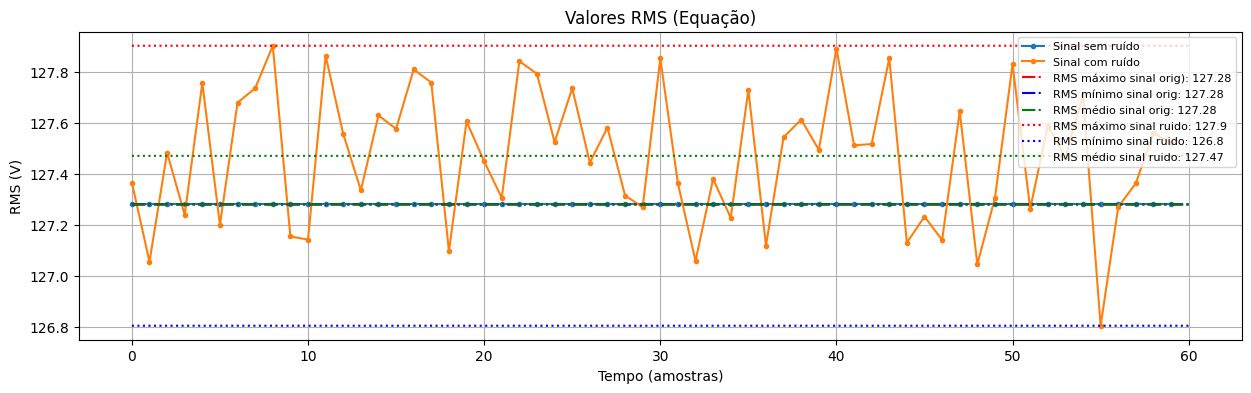

In [ ]:
#PLOTA OS GRÁFICOS
plt.figure(figsize=(15, 4)) #Define o tamanho da figura

#Plota os valores de RMS
x = np.arange(0, len(rms_eq_sinal), 1) #Cria um array que varia de 1 em 1
plt.plot(x, rms_eq_sinal, label='Sinal sem ruído', marker='.') #Plota o valor rms do sinal original
plt.plot(x, rms_eq_sinal_ruido, label='Sinal com ruído', marker='.') #Plota o valor rms do sinal ruidoso

#Plota os valores máximo, mínimo e médio - Sinal original
plt.plot(tempo, max_rms_array_sinal, linestyle='dashdot', label=f'RMS máximo sinal orig): {round(max_rms_sinal, 2)}', color='red') #Plota o valor máximo do sinal original
plt.plot(tempo, min_rms_array_sinal, linestyle='dashdot', label=f'RMS mínimo sinal orig: {round(min_rms_sinal, 2)}', color='blue') #Plota o valor mínimo do sinal original
plt.plot(tempo, mean_rms_array_sinal, linestyle='dashdot', label=f'RMS médio sinal orig: {round(mean_rms_sinal, 2)}', color='green') #Plota o valor médio do sinal original

#Plota os valores máximo, mínimo e médio - Sinal ruidoso
plt.plot(tempo, max_rms_array_ruido, linestyle='dotted', label=f'RMS máximo sinal ruido: {round(max_rms_sinal_ruido, 2)}', color='red') #Plota o valor máximo do sinal ruidoso
plt.plot(tempo, min_rms_array_ruido, linestyle='dotted', label=f'RMS mínimo sinal ruido: {round(min_rms_sinal_ruido, 2)}', color='blue') #Plota o valor mínimo do sinal ruidoso
plt.plot(tempo, mean_rms_array_ruido, linestyle='dotted', label=f'RMS médio sinal ruido: {round(mean_rms_sinal_ruido, 2)}', color='green') #Plota o valor médio do sinal ruidoso

plt.title('Valores RMS (Equação)') #Define o título
plt.xlabel('Tempo (amostras)') #Define a legenda do eixo x
plt.ylabel('RMS (V)') #Define a legenda do eixo y
plt.grid(True) #Ativa as "grades"
plt.legend(loc='upper right', fontsize = 8) #Ativa a legenda
plt.show() #Plota o gráfico

# **Cálculo do RMS por meio da equação simplificada**

**Equação RMS simplificada:**
\begin{equation}
\text{RMS} = {\frac{|x_n|}{\sqrt2}}
\end{equation}

In [ ]:
#CALCULA O RMS PARA CADA PERÍODO DEFINIDO - EQUAÇÃO RMS
rms_eq_simplific_sinal = np.zeros(len(sinal_segmento)) #Inicializa um vetor para armazenar os valores RMS do sinal original
rms_eq_simplific_sinal_ruido = np.zeros(len(sinal_segmento_ruido)) #Inicializa um vetor para armazenar os valores RMS do sinal ruidoso

i = 0 # Inicializa um contador
for i in range(len(sinal_segmento)): #Itera sob todos os segmentos
  rms_eq_simplific_sinal[i] = np.max(sinal_segmento[i]) / np.sqrt(2) #Calcula o RMS vide equação acima - sinal original
  rms_eq_simplific_sinal_ruido[i] = np.max(sinal_segmento_ruido[i]) / np.sqrt(2)  #Calcula o RMS vide equação acima - sinal ruidoso

**Valores estatísticos da equação RMS simplificada**

In [ ]:
#ENCONTRA OS VALORES MÁXIMOS, MÍNIMOS E MÉDIOS - SINAL ORIGINAL
max_rms_simplific_sinal = max(rms_eq_simplific_sinal) #Encontra o maior valor de RMS ao longo da senoide
min_rms_simplific_sinal = min(rms_eq_simplific_sinal) #Encontra o menor valor de RMS ao longo da senoide
mean_rms_simplific_sinal = sum(rms_eq_simplific_sinal/len(rms_eq_simplific_sinal)) #Calcula o valor médio de RMS ao longo da senoide
#ENCONTRA OS VALORES MÁXIMOS, MÍNIMOS E MÉDIOS - SINAL RUIDOSO
max_rms_simplific_sinal_ruido = max(rms_eq_simplific_sinal_ruido) #Encontra o maior valor de RMS ao longo da senoide
min_rms_simplific_sinal_ruido = min(rms_eq_simplific_sinal_ruido) #Encontra o menor valor de RMS ao longo da senoide
mean_rms_simplific_sinal_ruido = sum(rms_eq_simplific_sinal_ruido/len(rms_eq_simplific_sinal_ruido)) #Calcula o valor médio de RMS ao longo da senoide

**Cria arrays para permitir plotar temporalmente os valores estatísticos do RMS**

In [ ]:
#CRIA UM ARRAY COM O VALOR MÁXIMO, MÍNIMO E MÉDIO DO RMS CALCULADO - SINAL ORIGINAL
max_rms_simplific_array_sinal = np.full(len(tempo), max_rms_simplific_sinal) #Array constante com o maior valor de RMS ao longo da senoide
min_rms_simplific_array_sinal = np.full(len(tempo), min_rms_simplific_sinal) #Array constante com o menor valor de RMS ao longo da senoide
mean_rms_simplific_array_sinal = np.full(len(tempo), mean_rms_simplific_sinal) #Array constante com o valor médio de RMS ao longo da senoide

#CRIA UM ARRAY COM O VALOR MÁXIMO, MÍNIMO E MÉDIO DO RMS CALCULADO - SINAL COM RUIDO
max_rms_simplific_array_ruido = np.full(len(tempo), max_rms_simplific_sinal_ruido) #Array constante com o maior valor de RMS ao longo da senoide
min_rms_simplific_array_ruido = np.full(len(tempo), min_rms_simplific_sinal_ruido) #Array constante com o menor valor de RMS ao longo da senoide
mean_rms_simplific_array_ruido = np.full(len(tempo), mean_rms_simplific_sinal_ruido) #Array constante com o valor médio de RMS ao longo da senoide

**Plota os gráficos de RMS**

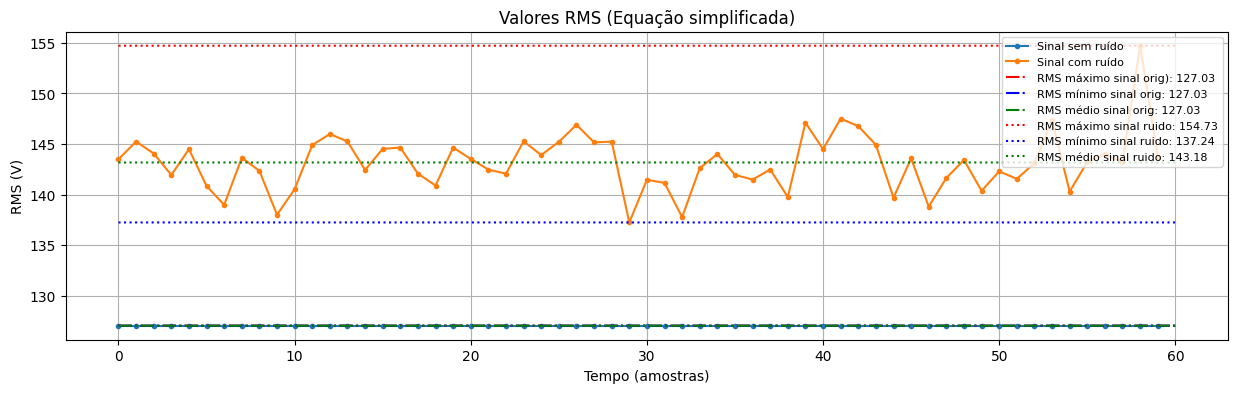

In [ ]:
#PLOTA O GRÁFICO
plt.figure(figsize=(15, 4)) #Define o tamanho da figura

#Plota os valores de RMS
x = np.arange(0, len(rms_eq_simplific_sinal), 1) #Cria um array que varia de 1 em 1
plt.plot(x, rms_eq_simplific_sinal, label='Sinal sem ruído', marker='.') #Plota o valor de RMS do sinal original
plt.plot(x, rms_eq_simplific_sinal_ruido, label='Sinal com ruído', marker='.') #Plota o valor RMS do sinal ruidoso

#Plota os valores máximo, mínimo e médio - Sinal original
plt.plot(tempo, max_rms_simplific_array_sinal, linestyle='dashdot', label=f'RMS máximo sinal orig): {round(max_rms_simplific_sinal, 2)}', color='red') #Plota o valor máximo do sinal original
plt.plot(tempo, min_rms_simplific_array_sinal, linestyle='dashdot', label=f'RMS mínimo sinal orig: {round(min_rms_simplific_sinal, 2)}', color='blue') #Plota o valor mínimo do sinal original
plt.plot(tempo, mean_rms_simplific_array_sinal, linestyle='dashdot', label=f'RMS médio sinal orig: {round(mean_rms_simplific_sinal, 2)}', color='green') #Plota o valor médio do sinal original

#Plota os valores máximo, mínimo e médio - Sinal ruidoso
plt.plot(tempo, max_rms_simplific_array_ruido, linestyle='dotted', label=f'RMS máximo sinal ruido: {round(max_rms_simplific_sinal_ruido, 2)}', color='red') #Plota o valor máximo do sinal original
plt.plot(tempo, min_rms_simplific_array_ruido, linestyle='dotted', label=f'RMS mínimo sinal ruido: {round(min_rms_simplific_sinal_ruido, 2)}', color='blue') #Plota o valor mínimo do sinal original
plt.plot(tempo, mean_rms_simplific_array_ruido, linestyle='dotted', label=f'RMS médio sinal ruido: {round(mean_rms_simplific_sinal_ruido, 2)}', color='green') #Plota o valor médio do sinal original

plt.title('Valores RMS (Equação simplificada)') #Define o título do gráfico
plt.xlabel('Tempo (amostras)') #Define a legenda do eixo x
plt.ylabel('RMS (V)') #Define a legenda do eixo y
plt.grid(True) #Ativa as "grades"
plt.legend(loc='upper right', fontsize = 8) #Ativa a legenda
plt.show() #Plota o gráfico

# **Comparação dos resultados RMS - Equação x Equação simplificada**

**Plota os gráficos com os valores de RMS**

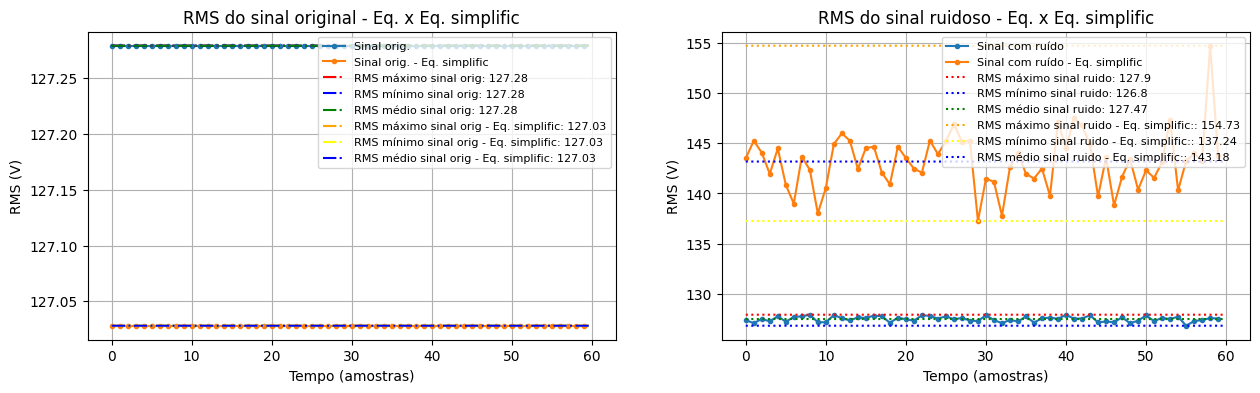

In [ ]:
#PLOTA O GRÁFICO - SINAL ORIGINAL
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4)) #Define o tamanho da figura

x = np.arange(0, len(rms_eq_sinal), 1) #Plota os valores de RMS

ax1.plot(x, rms_eq_sinal, label='Sinal orig.', marker='.') #Plota o valor RMS obtido via equação - sinal original
ax1.plot(x, rms_eq_simplific_sinal, label='Sinal orig. - Eq. simplific', marker='.') #Plota o valor RMS obtido via equação simplificada - sinal original

#Plota os valores máximo, mínimo e médio - Sinal original
ax1.plot(tempo, max_rms_array_sinal, linestyle='dashdot', label=f'RMS máximo sinal orig: {round(max_rms_sinal, 2)}', color='red') #Plota o valor RMS máximo do sinal original - Equação
ax1.plot(tempo, min_rms_array_sinal, linestyle='dashdot', label=f'RMS mínimo sinal orig: {round(min_rms_sinal, 2)}', color='blue') #Plota o valor RMS máximo do sinal original - Equação
ax1.plot(tempo, mean_rms_array_sinal, linestyle='dashdot', label=f'RMS médio sinal orig: {round(mean_rms_sinal, 2)}', color='green') #Plota o valor RMS máximo do sinal original - Equação

ax1.plot(tempo, max_rms_simplific_array_sinal, linestyle='dashdot', label=f'RMS máximo sinal orig - Eq. simplific: {round(max_rms_simplific_sinal, 2)}', color='orange') #Plota o valor RMS máximo do sinal original - Eq Simplific
ax1.plot(tempo, min_rms_simplific_array_sinal, linestyle='dashdot', label=f'RMS mínimo sinal orig - Eq. simplific: {round(min_rms_simplific_sinal, 2)}', color='yellow') #Plota o valor RMS máximo do sinal original - Eq Simplific
ax1.plot(tempo, mean_rms_simplific_array_sinal, linestyle='dashdot', label=f'RMS médio sinal orig - Eq. simplific: {round(mean_rms_simplific_sinal, 2)}', color='blue') #Plota o valor RMS máximo do sinal original - Eq Simplific

ax1.set_title('RMS do sinal original - Eq. x Eq. simplific') #Define o título
ax1.set_xlabel('Tempo (amostras)') #Define a legenda do eixo x
ax1.set_ylabel('RMS (V)') #Define a legenda do eixo y
ax1.grid(True) #Ativa as "grades"
ax1.legend(loc='upper right', fontsize = 8) #Ativa a legenda


#PLOTA O GRÁFICO - SINAL RUIDOSO
ax2.plot(x, rms_eq_sinal_ruido, label='Sinal com ruído', marker='.')  #Plota o valor RMS obtido via equação - sinal ruidoso
ax2.plot(x, rms_eq_simplific_sinal_ruido, label='Sinal com ruído - Eq. simplific', marker='.') #Plota o valor RMS obtido via equação simplificada - sinal ruidoso

#Plota os valores máximo, mínimo e médio - Sinal original
ax2.plot(tempo, max_rms_array_ruido, linestyle='dotted', label=f'RMS máximo sinal ruido: {round(max_rms_sinal_ruido, 2)}', color='red') #Plota o valor RMS máximo do sinal ruidoso - Equaçãoo
ax2.plot(tempo, min_rms_array_ruido, linestyle='dotted', label=f'RMS mínimo sinal ruido: {round(min_rms_sinal_ruido, 2)}', color='blue') #Plota o valor RMS máximo do sinal ruidoso  - Equação
ax2.plot(tempo, mean_rms_array_ruido, linestyle='dotted', label=f'RMS médio sinal ruido: {round(mean_rms_sinal_ruido, 2)}', color='green') #Plota o valor RMS máximo do sinal ruidoso  - Equaçãoo

ax2.plot(tempo, max_rms_simplific_array_ruido, linestyle='dotted', label=f'RMS máximo sinal ruido - Eq. simplific:: {round(max_rms_simplific_sinal_ruido, 2)}', color='orange') #Plota o valor RMS máximo do sinal ruidoso  - Eq Simplific
ax2.plot(tempo, min_rms_simplific_array_ruido, linestyle='dotted', label=f'RMS mínimo sinal ruido - Eq. simplific:: {round(min_rms_simplific_sinal_ruido, 2)}', color='yellow') #Plota o valor RMS máximo do sinal ruidoso  - Eq Simplific
ax2.plot(tempo, mean_rms_simplific_array_ruido, linestyle='dotted', label=f'RMS médio sinal ruido - Eq. simplific:: {round(mean_rms_simplific_sinal_ruido, 2)}', color='blue') #Plota o valor RMS máximo do sinal ruidoso  - Eq Simplific

ax2.set_title('RMS do sinal ruidoso - Eq. x Eq. simplific') #Define o título
ax2.set_xlabel('Tempo (amostras)') #Define a legenda do eixo x
ax2.set_ylabel('RMS (V)') #Define a legenda do eixo y
ax2.grid(True) #Ativa as "grades"
ax2.legend(loc='upper right', fontsize = 8) #Ativa a legenda

plt.show() #Plota o gráfico

# **Aplicação da Transformada Discreta de Fourier por meio da equação**

**DFT:**
\begin{equation}
\text{X[k]} = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N}nk}
\end{equation}

In [ ]:
#CRIA UMA FUNÇÃO PARA CALCULAR A DFT
def dft_multiplos_conjuntos(sinal, qtd_amostras):
  num_segmentos = len(sinal) #Define o número de segmentos

  dft = np.zeros((num_segmentos, qtd_amostras), dtype=np.complex128) #Inicializa o vetor para armazenar a dft
  dft_normal = np.zeros((num_segmentos, qtd_amostras), dtype=np.complex128) #Inicializa o vetor para armazenar a dft normalizada

  i = 0 #Inicializa o contador
  for i in range(num_segmentos): #Itera sob todos os segmentos
    k = 0 #Inicializa o contador
    for k in range(qtd_amostras): #Itera sob todas as amostras de cada segmento
      n = 0 #Inicializa o contador
      for n in range(qtd_amostras): #Itera sob todas as amostras de cada segmento
        dft[i, k] += sinal[i][n] * np.exp(-2j * np.pi * k * n / qtd_amostras) #Calcula a DFT vide equação acima

  i = 0 #Inicializa o contador
  for i in range(num_segmentos): #Itera sob todos os segmentos
    k = 0 #Inicializa o contador
    for k in range(qtd_amostras): #Itera sob todas as amostras de cada segmento
      dft_normal[i, k] = dft[i, k] / qtd_amostras #Normaliza a DFT

  return dft_normal #Retorna a DFT normalizada

**Calcula a DFT para o sinal original**

In [ ]:
dft_eq_normal = dft_multiplos_conjuntos(sinal_segmento, len(sinal_segmento[i])) #Calcula a DFT do sinal original

**Calcula a DFT para o sinal ruidoso**

In [ ]:
dft_eq_normal_ruido = dft_multiplos_conjuntos(sinal_segmento_ruido, len(sinal_segmento_ruido[i])) #Calcula a DFT do sinal ruidoso

**Cálculo das frequências associadas à Transformada Discreta de Fourier por meio da Equação**

**DFT:**
\begin{equation}
\text{kf}_0 =  {\frac{k}{N}f_s}
\end{equation}

In [ ]:
#CRIA UMA FUNÇÃO PARA CALCULAR AS FREQUÊNCIAS ASSOCIADAS À DFT
def calcular_frequencias(qtd_amostras, fa):
    freq = np.zeros(qtd_amostras) #Inicializa o vetor para armazenar a frequÊncia

    i = 0 #Inicializa o contador
    freq[i] = 0 #Define o primeiro elemento do array de frequências atrelada à DFT
    for i in range(0, ((int(qtd_amostras/2))-1)): #Itera a primeira metade das amostras
        freq[i+1] = freq[i] + (fa/qtd_amostras) #Calcula a frequência manual da primeira metade das amostras (valores de 0 até fa/2, com um passo de +fa/qtd_amostras_total)

    j = int(qtd_amostras/2) #Inicializa o contador
    freq[j] = -(fa/2) #Define o elemento do meio do array de frequências atrelada à DFT
    for j in range((int(qtd_amostras/2)), (qtd_amostras-1)): #Itera a segunda metade das amostras
        freq[j+1] = freq[j] + (fa/qtd_amostras) #Calcula a frequência manual da segunda metade das amostras (valores de -fa/2 até 0, com um passo de +fa/qtd_amostras_total)

    return freq #Retorna a frequência

freq_eq = calcular_frequencias(fa, fa) #Calcula a frequência

**Limita somente as frequÊncias positivas**

In [ ]:
freq_eq_pos = freq_eq[:len(dft_eq_normal[i])//2] #Corta o vetor de frequência na metade
dft_eq_normal_pos = dft_eq_normal[:, :len(dft_eq_normal[i])//2] #Corta o vetor de DFT do sinal limpo na metade
dft_eq_normal_ruido_pos = dft_eq_normal_ruido[:, :len(dft_eq_normal_ruido[i])//2] #Corta o vetor de DFT do sinal ruidoso na metade

**Plota o gráfico do espectro de frequência da DFT calculada por meio da equação**

In [ ]:
# PLOTA O ESPECTRO DE FREQUÊNCIA
num_linhas = len(sinal_segmento) // 6 + int(len(sinal_segmento) % 6 != 0)
fig, axes = plt.subplots(nrows=num_linhas, ncols=6, figsize=(25, 4*num_linhas))

for i in range(len(sinal_segmento)):
   ax = axes[i // 6, i % 6]
   ax.plot(freq_eq_pos, np.abs(dft_eq_normal_pos[i]), label='DFT sinal orig')  # Use dft_eq_normal_pos
   ax.plot(freq_eq_pos, np.abs(dft_eq_normal_ruido_pos[i]), label='DFT sinal ruido')  # Correção do label
   ax.set_xlabel('Frequência (Hz)')
   ax.set_xlim(0, 120)
   ax.set_ylabel('Amplitude')
   ax.set_title(f'Segmento {i+1}')
   ax.grid(True)
   ax.legend()

plt.tight_layout()
plt.show()

# **Aplicação da Transformada Discreta de Fourier por meio de bibliotecas**

**Cálculo da transformada discreta de fourier por meio de bibliotecas**

In [ ]:
#INICIALIZA OS VETORES ATRELADOS A DFT
dft_biblio = np.zeros((len(sinal_segmento), fa), dtype=np.complex128)
dft_biblio_normal = np.zeros((len(sinal_segmento), fa), dtype=np.complex128)
freq_biblio = np.zeros((len(sinal_segmento), fa))

dft_biblio_ruido = np.zeros((len(sinal_segmento_ruido), fa), dtype=np.complex128)
dft_biblio_normal_ruido = np.zeros((len(sinal_segmento_ruido), fa), dtype=np.complex128)
freq_biblio_ruido = np.zeros((len(sinal_segmento_ruido), fa))

#CALCULA A DFT PARA TODOS OS SEGMENTOS
i = 0
for i in range(len(sinal_segmento)):
    dft_biblio[i] = np.fft.fft(sinal_segmento[i])
    dft_biblio_normal[i] = dft_biblio[i] / len(sinal_segmento[i])
    freq_biblio[i] = np.fft.fftfreq(len(dft_biblio_normal[i]), d=1/fa)

    dft_biblio_ruido[i] = np.fft.fft(sinal_segmento_ruido[i])
    dft_biblio_normal_ruido[i] = dft_biblio_ruido[i] / len(sinal_segmento_ruido[i])
    freq_biblio_ruido[i] = np.fft.fftfreq(len(dft_biblio_normal_ruido[i]), d=1/fa)


**Plota o gráfico do espectro de frequência da DFT calculada por meio de bibliotecas**

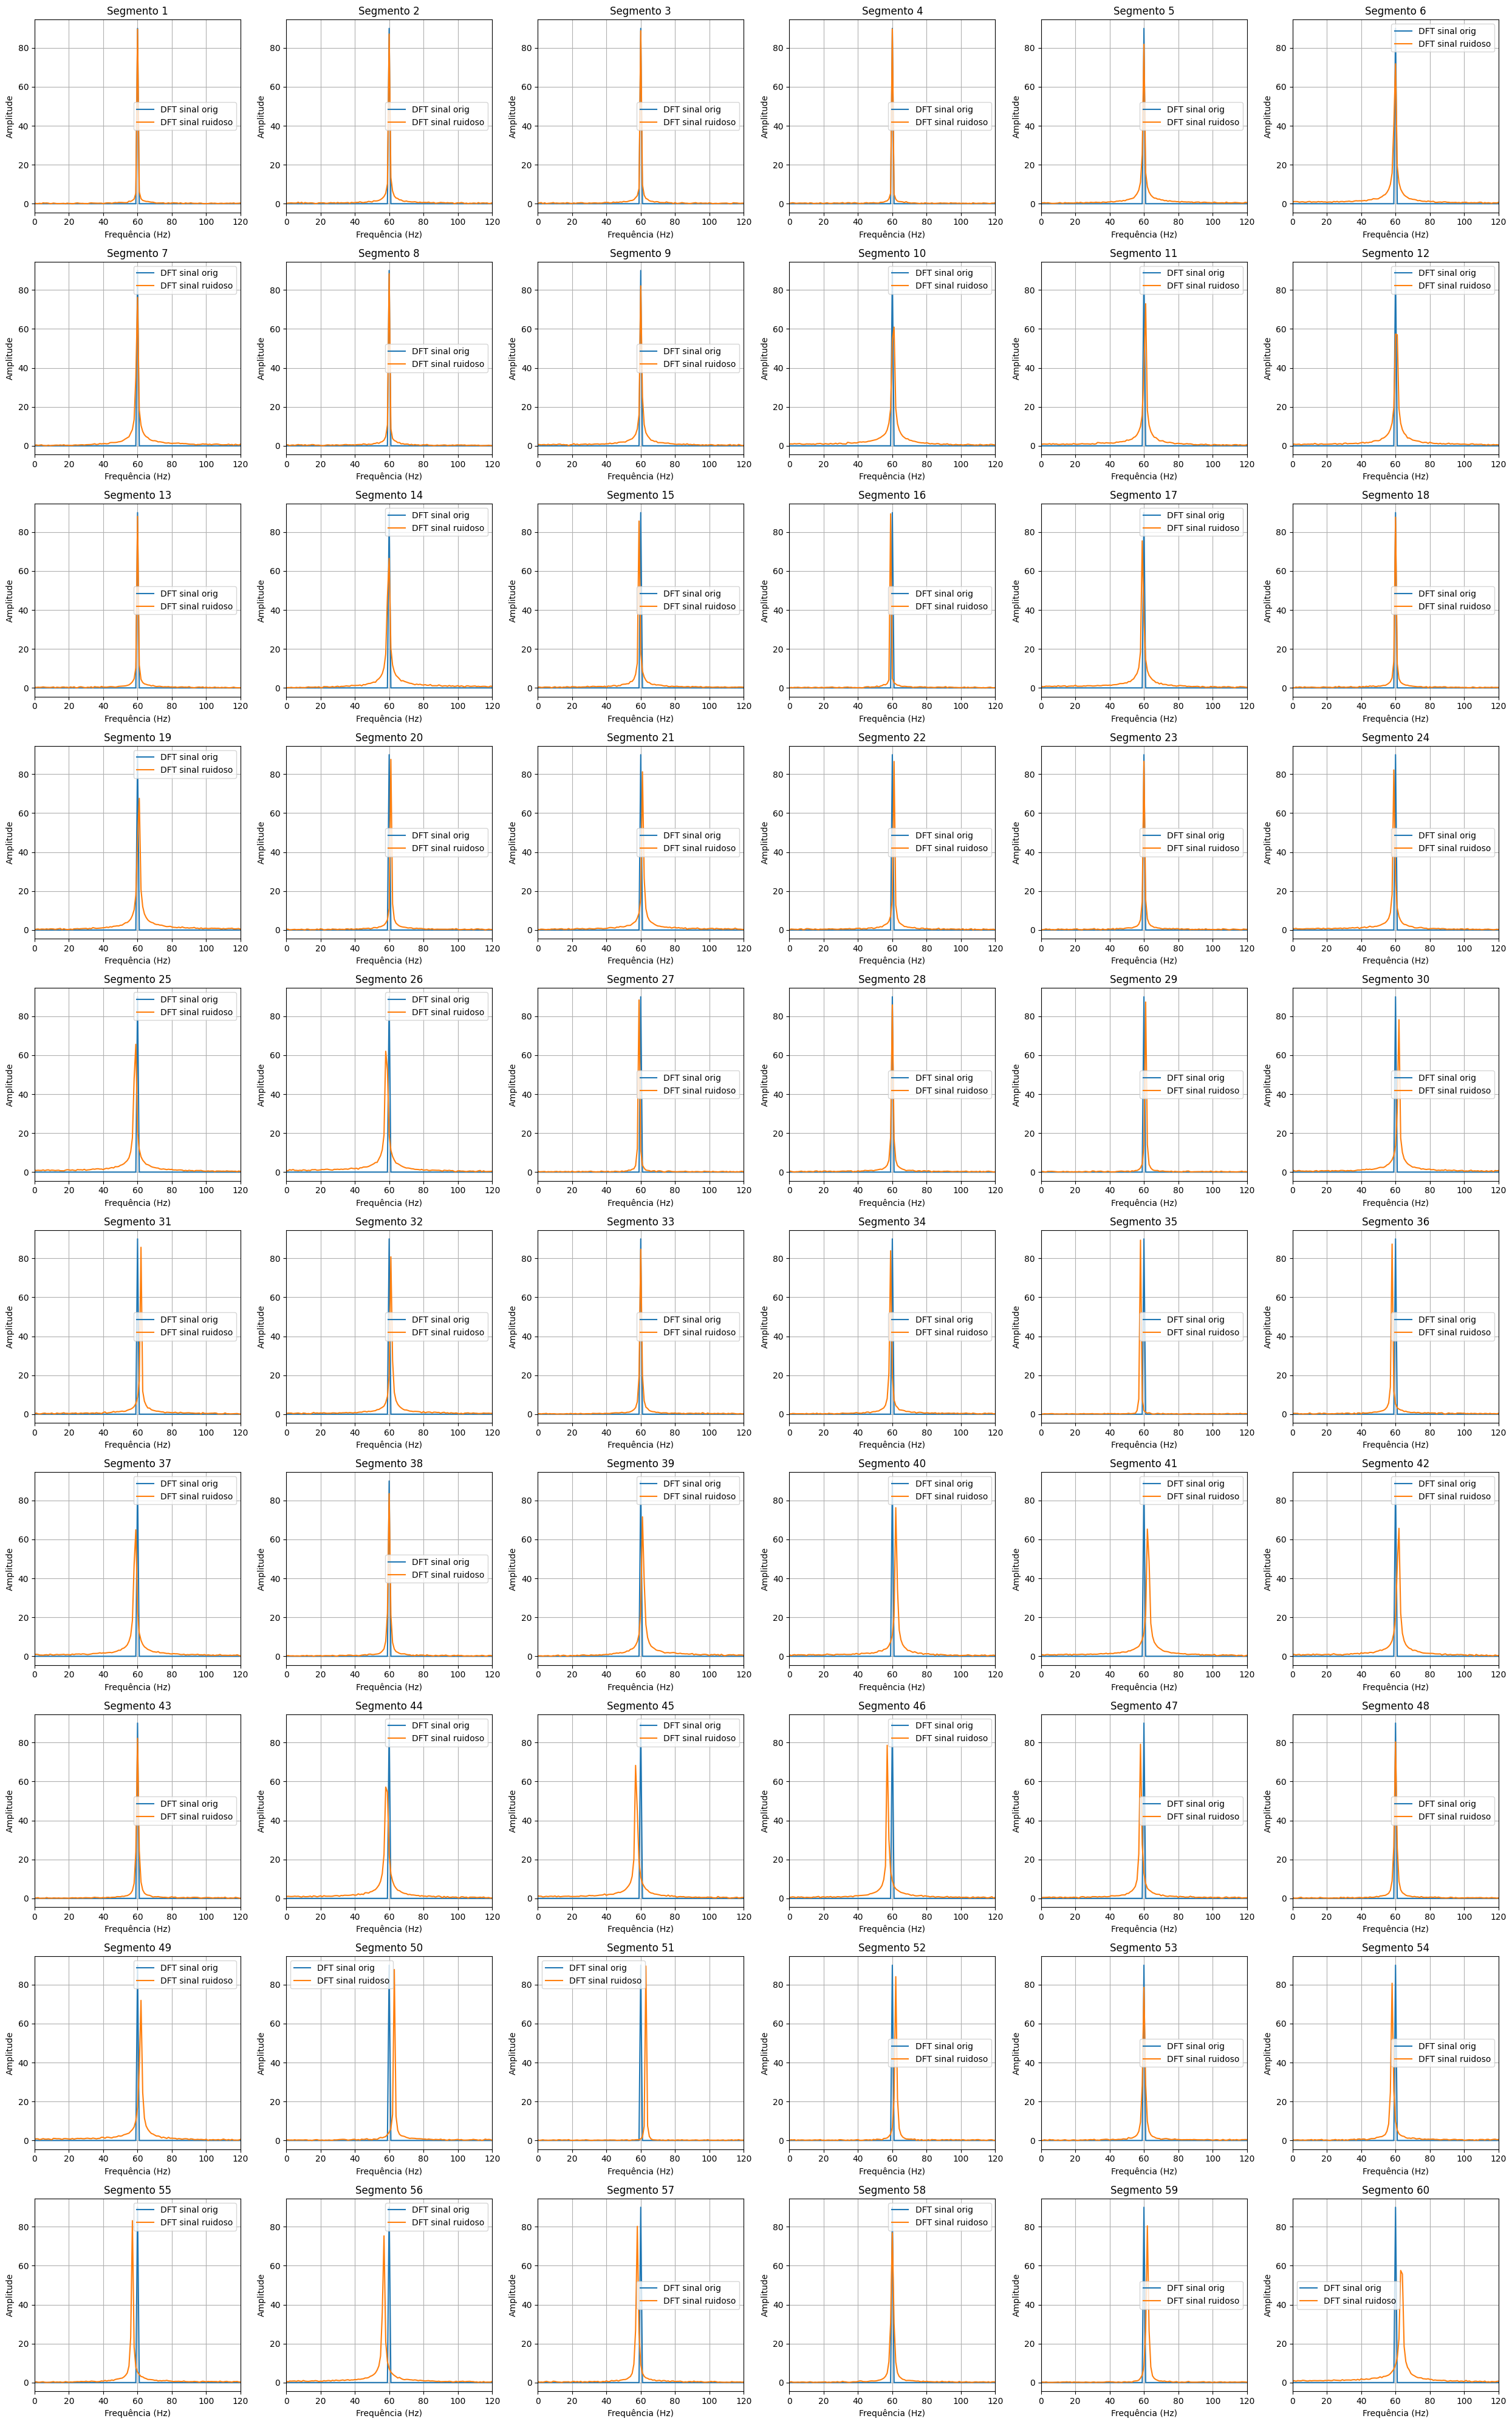

In [ ]:
freq_biblio_positivo = freq_biblio[:, :int(len(freq_biblio[0])/2)]
freq_biblio_ruido_positivo = freq_biblio_ruido[:, :int(len(freq_biblio_ruido[0])/2)]

dft_biblio_normal_pos = dft_biblio_normal[:, :len(dft_biblio_normal[i])//2]
dft_biblio_normal_ruido_pos = dft_biblio_normal_ruido[:, :len(dft_biblio_normal_ruido[i])//2]

# PLOTA O ESPECTRO DE FREQUÊNCIA
num_linhas = len(sinal_segmento) // 6 + int(len(sinal_segmento) % 6 != 0)
fig, axes = plt.subplots(nrows=num_linhas, ncols=6, figsize=(25, 4*num_linhas))

i = 0
for i in range(len(sinal_segmento)):
    ax = axes[i // 6, i % 6]
    ax.plot(freq_biblio_positivo[i], np.abs(dft_biblio_normal_pos[i]), label='DFT sinal orig')
    ax.plot(freq_biblio_ruido_positivo[i], np.abs(dft_biblio_normal_ruido_pos[i]), label='DFT sinal ruidoso')
    ax.set_xlabel('Frequência (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Segmento {i+1}')
    ax.set_xlim(0, 120)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

# **Cálculo do RMS por meio da DFT**

**Cálculo do True RMS por meio da DFT**

\begin{equation}
\text{RMS} = \sqrt{2{\sum_{f=0}^{f=fa/2} |X(f)|^2}} = \sqrt{{\sum_{f=0}^{f=fa} |X(f)|^2}}
\end{equation}

In [ ]:
# CALCULA O RMS PARA CADA PERÍODO DEFINIDO - EQUAÇÃO RMS
rms_dft_biblio_sinal = np.zeros(len(dft_biblio_normal_pos))

i = 0
for i in range(len(dft_biblio_normal_pos)):
  j = 0
  for j in range(len(dft_biblio_normal_pos[i])):
    rms_dft_biblio_sinal[i] += 2*np.abs(dft_biblio_normal_pos[i][j])**2

rms_dft_biblio_sinal = np.sqrt(rms_dft_biblio_sinal)

#ENCONTRA OS VALORES MÁXIMOS, MÍNIMOS E MÉDIOS - SINAL ORIGINAL
max_rms_dft_biblio_sinal = max(rms_dft_biblio_sinal) #Encontra o maior valor de RMS ao longo da senoide -> Eq. somatório
min_rms_dft_biblio_sinal = min(rms_dft_biblio_sinal) #Encontra o menor valor de RMS ao longo da senoide -> Eq. somatório
mean_rms_dft_biblio_sinal = sum(rms_dft_biblio_sinal/len(rms_dft_biblio_sinal)) #Calcula o valor médio de RMS ao longo da senoide -> Eq. somatório

#CRIA UM ARRAY COM O VALOR MÁXIMO, MÍNIMO E MÉDIO DO RMS CALCULADO - SINAL ORIGINAL
max_rms_dft_biblio_sinal_array = np.full(len(tempo), max_rms_dft_biblio_sinal)
min_rms_dft_biblio_sinal_array = np.full(len(tempo), min_rms_dft_biblio_sinal)
mean_rms_dft_biblio_sinal_array = np.full(len(tempo), mean_rms_dft_biblio_sinal)

In [ ]:
# CALCULA O RMS PARA CADA PERÍODO DEFINIDO - EQUAÇÃO RMS
rms_dft_biblio_sinal_ruido = np.zeros(len(dft_biblio_normal_ruido_pos))

i = 0
for i in range(len(dft_biblio_normal_ruido_pos)):
  j = 0
  for j in range(len(dft_biblio_normal_ruido_pos[i])):
    rms_dft_biblio_sinal_ruido[i] += (2*np.abs(dft_biblio_normal_ruido_pos[i][j])**2)

rms_dft_biblio_sinal_ruido = np.sqrt(rms_dft_biblio_sinal_ruido)

#ENCONTRA OS VALORES MÁXIMOS, MÍNIMOS E MÉDIOS - SINAL ORIGINAL
max_rms_dft_biblio_sinal_ruido = max(rms_dft_biblio_sinal_ruido) #Encontra o maior valor de RMS ao longo da senoide -> Eq. somatório
min_rms_dft_biblio_sinal_ruido = min(rms_dft_biblio_sinal_ruido) #Encontra o menor valor de RMS ao longo da senoide -> Eq. somatório
mean_rms_dft_biblio_sinal_ruido = sum(rms_dft_biblio_sinal_ruido/len(rms_dft_biblio_sinal_ruido)) #Calcula o valor médio de RMS ao longo da senoide -> Eq. somatório

#CRIA UM ARRAY COM O VALOR MÁXIMO, MÍNIMO E MÉDIO DO RMS CALCULADO - SINAL ORIGINAL
max_rms_dft_biblio_sinal_ruido_array = np.full(len(tempo), max_rms_dft_biblio_sinal_ruido)
min_rms_dft_biblio_sinal_ruido_array = np.full(len(tempo), min_rms_dft_biblio_sinal_ruido)
mean_rms_dft_biblio_sinal_ruido_array = np.full(len(tempo), mean_rms_dft_biblio_sinal_ruido)

In [ ]:
# CALCULA O RMS PARA CADA PERÍODO DEFINIDO - EQUAÇÃO RMS
rms_dft_eq_sinal = np.zeros(len(dft_eq_normal_pos))

i = 0
for i in range(len(dft_eq_normal_pos)):
  j = 0
  for j in range(len(dft_eq_normal_pos[i])):
    rms_dft_eq_sinal[i] += (2*np.abs(dft_eq_normal_pos[i][j])**2)

rms_dft_eq_sinal = np.sqrt(rms_dft_eq_sinal)

#ENCONTRA OS VALORES MÁXIMOS, MÍNIMOS E MÉDIOS - SINAL ORIGINAL
max_rms_dft_eq_sinal = max(rms_dft_eq_sinal) #Encontra o maior valor de RMS ao longo da senoide -> Eq. somatório
min_rms_dft_eq_sinal = min(rms_dft_eq_sinal) #Encontra o menor valor de RMS ao longo da senoide -> Eq. somatório
mean_rms_dft_eq_sinal = sum(rms_dft_eq_sinal/len(rms_dft_eq_sinal)) #Calcula o valor médio de RMS ao longo da senoide -> Eq. somatório

#CRIA UM ARRAY COM O VALOR MÁXIMO, MÍNIMO E MÉDIO DO RMS CALCULADO - SINAL ORIGINAL
max_rms_dft_eq_sinal_array = np.full(len(tempo), max_rms_dft_eq_sinal)
min_rms_dft_eq_sinal_array = np.full(len(tempo), min_rms_dft_eq_sinal)
mean_rms_dft_eq_sinal_array = np.full(len(tempo), mean_rms_dft_eq_sinal)

In [ ]:
# CALCULA O RMS PARA CADA PERÍODO DEFINIDO - EQUAÇÃO RMS
rms_dft_eq_sinal_ruido = np.zeros(len(dft_eq_normal_ruido_pos))

i = 0
for i in range(len(dft_eq_normal_ruido_pos)):
  j = 0
  for j in range(len(dft_eq_normal_ruido_pos[i])):
    rms_dft_eq_sinal_ruido[i] += (2*np.abs(dft_eq_normal_ruido_pos[i][j])**2)

rms_dft_eq_sinal_ruido = np.sqrt(rms_dft_eq_sinal_ruido)

#ENCONTRA OS VALORES MÁXIMOS, MÍNIMOS E MÉDIOS - SINAL ORIGINAL
max_rms_dft_eq_sinal_ruido = max(rms_dft_eq_sinal_ruido) #Encontra o maior valor de RMS ao longo da senoide -> Eq. somatório
min_rms_dft_eq_sinal_ruido = min(rms_dft_eq_sinal_ruido) #Encontra o menor valor de RMS ao longo da senoide -> Eq. somatório
mean_rms_dft_eq_sinal_ruido = sum(rms_dft_eq_sinal_ruido/len(rms_dft_eq_sinal_ruido)) #Calcula o valor médio de RMS ao longo da senoide -> Eq. somatório

#CRIA UM ARRAY COM O VALOR MÁXIMO, MÍNIMO E MÉDIO DO RMS CALCULADO - SINAL ORIGINAL
max_rms_dft_eq_sinal_ruido_array = np.full(len(tempo), max_rms_dft_eq_sinal_ruido)
min_rms_dft_eq_sinal_ruido_array = np.full(len(tempo), min_rms_dft_eq_sinal_ruido)
mean_rms_dft_eq_sinal_ruido_array = np.full(len(tempo), mean_rms_dft_eq_sinal_ruido)

# **Comparação dos resultados RMS - DFT biblioteca x DFT equação**

**Plota os gráficos com os valores de RMS**

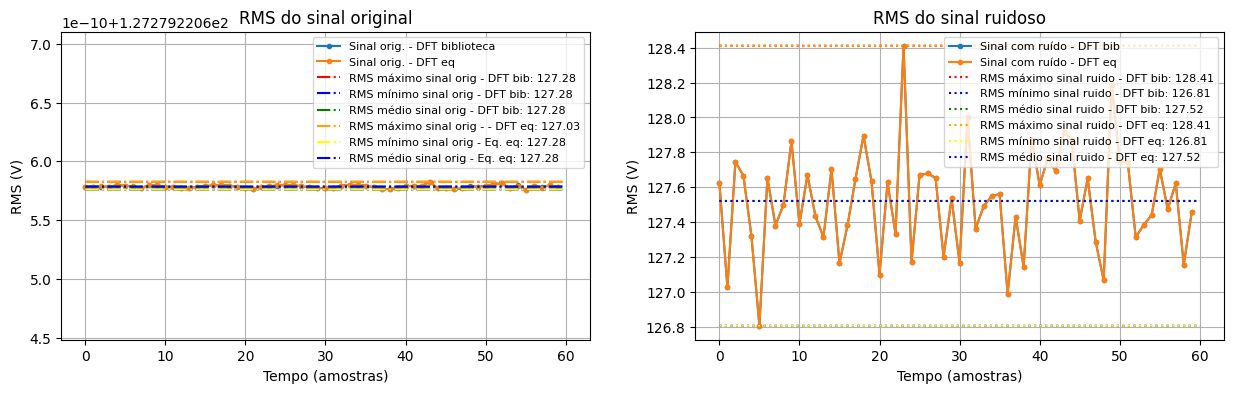

In [ ]:
#SINAL ORIGINAL
#Plota o gráfico
# Cria uma figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))  # 1 linha, 2 colunas

#Plota os valores de RMS
x = np.arange(0, len(rms_eq_sinal), 1)

ax1.plot(x, rms_dft_biblio_sinal, label='Sinal orig. - DFT biblioteca', marker='.')
ax1.plot(x, rms_dft_eq_sinal, label='Sinal orig. - DFT eq', marker='.')

#Plota os valores máximo, mínimo e médio - Sinal original
ax1.plot(tempo, max_rms_dft_biblio_sinal_array, linestyle='dashdot', label=f'RMS máximo sinal orig - DFT bib: {round(max_rms_dft_biblio_sinal, 2)}', color='red')
ax1.plot(tempo, min_rms_dft_biblio_sinal_array, linestyle='dashdot', label=f'RMS mínimo sinal orig - DFT bib: {round(min_rms_dft_biblio_sinal, 2)}', color='blue')
ax1.plot(tempo, mean_rms_dft_biblio_sinal_array, linestyle='dashdot', label=f'RMS médio sinal orig - DFT bib: {round(mean_rms_dft_biblio_sinal, 2)}', color='green')

ax1.plot(tempo, max_rms_dft_eq_sinal_array, linestyle='dashdot', label=f'RMS máximo sinal orig - - DFT eq: {round(max_rms_simplific_sinal, 2)}', color='orange')
ax1.plot(tempo, min_rms_dft_eq_sinal_array, linestyle='dashdot', label=f'RMS mínimo sinal orig - Eq. eq: {round(min_rms_dft_eq_sinal, 2)}', color='yellow')
ax1.plot(tempo, mean_rms_dft_eq_sinal_array, linestyle='dashdot', label=f'RMS médio sinal orig - Eq. eq: {round(mean_rms_dft_eq_sinal, 2)}', color='blue')

ax1.set_title('RMS do sinal original')
ax1.set_xlabel('Tempo (amostras)')
ax1.set_ylabel('RMS (V)')
ax1.grid(True)
ax1.legend(loc='upper right', fontsize = 8)



#SINAL RUIDOSO
#Plota os valores de RMS
ax2.plot(x, rms_dft_biblio_sinal_ruido, label='Sinal com ruído - DFT bib', marker='.')
ax2.plot(x, rms_dft_eq_sinal_ruido, label='Sinal com ruído - DFT eq', marker='.')

#Plota os valores máximo, mínimo e médio - Sinal original
ax2.plot(tempo, max_rms_dft_biblio_sinal_ruido_array, linestyle='dotted', label=f'RMS máximo sinal ruido - DFT bib: {round(max_rms_dft_biblio_sinal_ruido, 2)}', color='red')
ax2.plot(tempo, min_rms_dft_biblio_sinal_ruido_array, linestyle='dotted', label=f'RMS mínimo sinal ruido - DFT bib: {round(min_rms_dft_biblio_sinal_ruido, 2)}', color='blue')
ax2.plot(tempo, mean_rms_dft_biblio_sinal_ruido_array, linestyle='dotted', label=f'RMS médio sinal ruido - DFT bib: {round(mean_rms_dft_biblio_sinal_ruido, 2)}', color='green')

ax2.plot(tempo, max_rms_dft_eq_sinal_ruido_array, linestyle='dotted', label=f'RMS máximo sinal ruido - DFT eq: {round(max_rms_dft_eq_sinal_ruido, 2)}', color='orange')
ax2.plot(tempo, min_rms_dft_eq_sinal_ruido_array, linestyle='dotted', label=f'RMS mínimo sinal ruido - DFT eq: {round(min_rms_dft_eq_sinal_ruido, 2)}', color='yellow')
ax2.plot(tempo, mean_rms_dft_eq_sinal_ruido_array, linestyle='dotted', label=f'RMS médio sinal ruido - DFT eq: {round(mean_rms_dft_eq_sinal_ruido, 2)}', color='blue')

ax2.set_title('RMS do sinal ruidoso')
ax2.set_xlabel('Tempo (amostras)')
ax2.set_ylabel('RMS (V)')
ax2.grid(True)
ax2.legend(loc='upper right', fontsize = 8)

plt.show()

# **Comparação dos resultados RMS - RMS equação x DFT equação**

**Plota os gráficos de RMS**

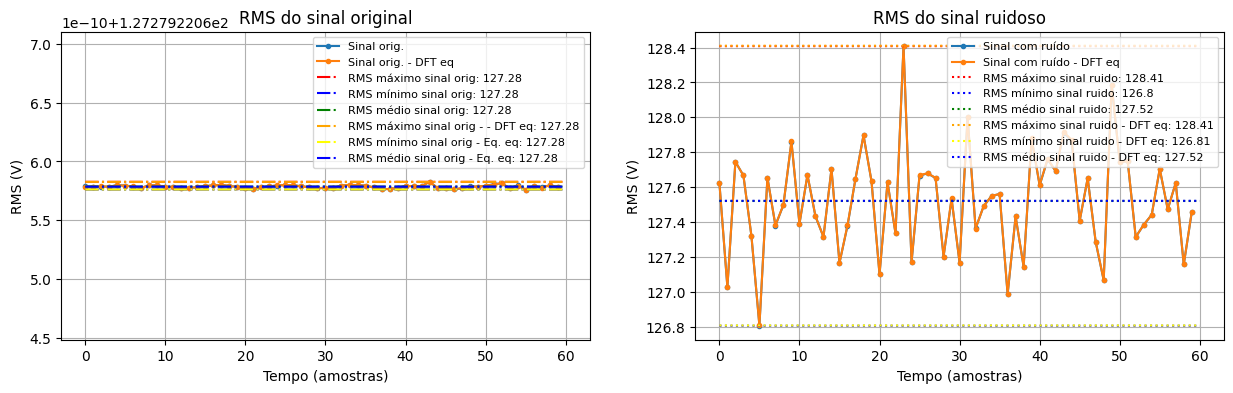

In [ ]:
#SINAL ORIGINAL
#Plota o gráfico
# Cria uma figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))  # 1 linha, 2 colunas

#Plota os valores de RMS
x = np.arange(0, len(rms_eq_sinal), 1)

ax1.plot(x, rms_eq_sinal, label='Sinal orig.', marker='.')
ax1.plot(x, rms_dft_eq_sinal, label='Sinal orig. - DFT eq', marker='.')
#Plota os valores máximo, mínimo e médio - Sinal original
ax1.plot(tempo, max_rms_array_sinal, linestyle='dashdot', label=f'RMS máximo sinal orig: {round(max_rms_sinal, 2)}', color='red')
ax1.plot(tempo, min_rms_array_sinal, linestyle='dashdot', label=f'RMS mínimo sinal orig: {round(min_rms_sinal, 2)}', color='blue')
ax1.plot(tempo, mean_rms_array_sinal, linestyle='dashdot', label=f'RMS médio sinal orig: {round(mean_rms_sinal, 2)}', color='green')

#Plota os valores máximo, mínimo e médio - Sinal original
ax1.plot(tempo, max_rms_dft_eq_sinal_array, linestyle='dashdot', label=f'RMS máximo sinal orig - - DFT eq: {round(max_rms_dft_eq_sinal, 2)}', color='orange')
ax1.plot(tempo, min_rms_dft_eq_sinal_array, linestyle='dashdot', label=f'RMS mínimo sinal orig - Eq. eq: {round(min_rms_dft_eq_sinal, 2)}', color='yellow')
ax1.plot(tempo, mean_rms_dft_eq_sinal_array, linestyle='dashdot', label=f'RMS médio sinal orig - Eq. eq: {round(mean_rms_dft_eq_sinal, 2)}', color='blue')

ax1.set_title('RMS do sinal original')
ax1.set_xlabel('Tempo (amostras)')
ax1.set_ylabel('RMS (V)')
ax1.grid(True)
ax1.legend(loc='upper right', fontsize = 8)


#SINAL RUIDOSO
#Plota os valores de RMS
ax2.plot(x, rms_eq_sinal_ruido, label='Sinal com ruído', marker='.')
ax2.plot(x, rms_dft_eq_sinal_ruido, label='Sinal com ruído - DFT eq', marker='.')

#Plota os valores máximo, mínimo e médio - Sinal original
ax2.plot(tempo, max_rms_array_ruido, linestyle='dotted', label=f'RMS máximo sinal ruido: {round(max_rms_sinal_ruido, 2)}', color='red')
ax2.plot(tempo, min_rms_array_ruido, linestyle='dotted', label=f'RMS mínimo sinal ruido: {round(min_rms_sinal_ruido, 2)}', color='blue')
ax2.plot(tempo, mean_rms_array_ruido, linestyle='dotted', label=f'RMS médio sinal ruido: {round(mean_rms_sinal_ruido, 2)}', color='green')

ax2.plot(tempo, max_rms_dft_eq_sinal_ruido_array, linestyle='dotted', label=f'RMS máximo sinal ruido - DFT eq: {round(max_rms_dft_eq_sinal_ruido, 2)}', color='orange')
ax2.plot(tempo, min_rms_dft_eq_sinal_ruido_array, linestyle='dotted', label=f'RMS mínimo sinal ruido - DFT eq: {round(min_rms_dft_eq_sinal_ruido, 2)}', color='yellow')
ax2.plot(tempo, mean_rms_dft_eq_sinal_ruido_array, linestyle='dotted', label=f'RMS médio sinal ruido - DFT eq: {round(mean_rms_dft_eq_sinal_ruido, 2)}', color='blue')

ax2.set_title('RMS do sinal ruidoso')
ax2.set_xlabel('Tempo (amostras)')
ax2.set_ylabel('RMS (V)')
ax2.grid(True)
ax2.legend(loc='upper right', fontsize = 8)

plt.show()

In [ ]:
x = int(1.5)
print(x)

1
